In [ ]:
# jupyter nbconvert Analysis_Silas.ipynb --to slides --template output_toggle --post serve

# W200 Final Project Proposal


# US foreign aid spending and the diffusion of democracy

## ***Has US foreign aid spending coincided with global democratic development?***

- Silas Everett
- Alex Herring
- December 13, 2017

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import wbdata
import pandas as pd
import cartopy
import re
import numpy as np
from IPython.core.display import display, HTML


%matplotlib inline

path = 'c:/Users/silas/MIDS/jupyternotebooks/USAID/'
fhfawb = pd.read_pickle('{}fhfawb.pickle'.format(path))

# world.plot(column='gdp_per_cap')
# world.plot(column='gdp_per_cap', cmap='OrRd')
# world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

In [2]:
pd.options.display.max_columns = 150

> # About the Data
- U.S. Foreign Aid - https://explorer.usaid.gov/data.html
- Freedom House - https://freedomhouse.org/report/fiw-2017-table-country-scores
- World Bank (wbdata API) - https://wbdata.readthedocs.io/en/latest/
- FIPS codes CIA fact book https://www.cia.gov/library/publications/the-world-factbook/appendix/appendix-d.html

In [3]:
print('Shape after merge: {} rows {} columns'.format(fhfawb.shape[0],fhfawb.shape[1]))
fhfawb.columns

Shape after merge: 2052366 rows 62 columns


Index(['FH_Score', 'year', 'country', 'FH_value', 'date', 'gdppc', 'gini',
       'nat', 'pop', 'voice', 'wb_code', 'GEC', 'ISO3166_S', 'ISO3166_N',
       'internet', 'country_id', 'country_y', 'region_id', 'region_name',
       'income_group_id', 'income_group_name', 'income_group_acronym',
       'implementing_agency_id', 'implementing_agency_acronym',
       'implementing_agency_name', 'implementing_subagency_id',
       'subagency_acronym', 'subagency_name', 'channel_category_id',
       'channel_category_name', 'channel_subcategory_id',
       'channel_subcategory_name', 'channel_id', 'channel_name',
       'dac_category_id', 'dac_category_name', 'dac_sector_code',
       'dac_sector_name', 'dac_purpose_code', 'dac_purpose_name',
       'funding_account_id', 'funding_account_name', 'funding_agency_id',
       'funding_agency_name', 'funding_agency_acronym',
       'assistance_category_id', 'assistance_category_name',
       'aid_type_group_id', 'aid_type_group_name', 'activity_id

CIVIL LIBERTIES SCORING - Freedom House (https://freedomhouse.org/report/freedom-world-2016/methodology)

1 – Countries and territories with a rating of 1 enjoy a wide range of civil liberties, including freedoms of expression, assembly, association, education, and religion. They have an established and generally fair legal system that ensures the rule of law (including an independent judiciary), allow free economic activity, and tend to strive for equality of opportunity for everyone, including women and minority groups.

2 – Countries and territories with a rating of 2 have slightly weaker civil liberties than those with a rating of 1 because of such factors as limits on media independence, restrictions on trade union activities, and discrimination against minority groups and women.

3, 4, 5 – Countries and territories with a rating of 3, 4, or 5 either moderately protect almost all civil liberties or strongly protect some civil liberties while neglecting others. The same factors that undermine freedom in countries with a rating of 2 may also weaken civil liberties in those with a rating of 3, 4, or 5, but to a greater extent at each successive rating.

6 – Countries and territories with a rating of 6 have very restricted civil liberties. They strongly limit the rights of expression and association and frequently hold political prisoners. They may allow a few civil liberties, such as some religious and social freedoms, some highly restricted private business activity, and some open and free private discussion.

7 – Countries and territories with a rating of 7 have few or no civil liberties. They allow virtually no freedom of expression or association, do not protect the rights of detainees and prisoners, and often control or dominate most economic activity.

# Question 2: How has democratic developed globally evolved over time?
- Overall trends in country democratic status
- Countries within the following democratic status

In [4]:
# select on Civil Liberties here
df = fhfawb[fhfawb.FH_Score == 'CL']

df = df.groupby(['year','country']).agg({'FH_value':[max]}).unstack().T.reset_index()

# wrangling a bit here - reset index will delete FH value
del df['level_0']
del df['level_1']

df = df.set_index('country').T.replace('-', np.nan)

df = df.apply(lambda row: row.astype(str).str.replace(r"\(.*\)",""), axis=1)

# float is critical to get stats going - int won't work
df = df.astype(float, error='ignore')

df.Yugoslavia = df.Yugoslavia.replace('nan',np.nan)

> A Longitudinal Perspective on Freedom in The World
- Freedom House Data 1972 to 2016

In [5]:
# DATAFRAME 2 - value counts by year into a single dataframe
df2 = pd.DataFrame()
for i in range(1972,2017):
    df2[i] = df.T[i].value_counts()

df2 = df2.reset_index().rename(columns={'index':'FH_value'})\
.sort_values(by='FH_value').reset_index(drop=True).set_index('FH_value')

df2.iloc[0:7,::-1]

,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975,1974,1973,1972
FH_value,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,48,49,49,50,49,49,49,50,51,52,52,53,49,41,37,29,30,29,28,28,29,30,29,31,31,30,27,29,23,24,23,20,20,18,18,18,18,18,18,18,21,19,19,19,18
2.0,32,30,32,31,32,31,31,31,29,28,29,29,29,37,38,39,40,38,37,36,35,33,30,27,29,22,25,20,23,23,24,24,23,26,25,25,20,25,22,21,18,21,21,23,23
3.0,26,30,28,27,26,30,31,27,32,32,33,34,34,30,29,31,28,29,31,29,29,26,30,28,39,35,19,25,21,15,15,16,15,13,14,14,19,15,13,12,14,13,15,13,16
4.0,28,26,26,31,29,28,26,31,28,29,28,23,24,26,27,26,29,29,34,33,31,33,29,31,22,30,28,16,12,13,13,14,13,14,11,11,16,17,19,24,19,20,20,14,14
5.0,28,27,27,27,32,30,33,32,31,31,29,31,32,32,34,35,35,36,29,26,28,27,30,34,32,37,32,30,27,30,31,32,36,36,40,40,34,32,33,29,30,33,27,30,24
6.0,22,23,23,19,18,18,15,14,14,13,14,13,15,17,17,21,18,18,19,22,21,22,20,18,20,14,15,24,37,35,33,32,33,36,37,37,34,34,31,30,37,32,31,33,36
7.0,11,10,10,10,9,9,9,9,8,8,8,9,9,9,10,11,12,13,13,17,18,20,23,21,13,14,18,22,22,25,26,27,25,21,18,18,20,19,21,20,19,20,19,18,18


In [6]:
# df.mean().sort_values(ascending=False).plot(kind='pie', autopct='%.2f', figsize=(14,3))

> Autocratic Systems Are Memorable but Increasingly Rare

In [7]:
# top ten not free
pd.DataFrame(df.mean().sort_values(ascending=False))[0].astype(int).head(10)

country
Vietnam, N.                    7
Korea, Dem. People���s Rep.    7
Yemen, S.                      7
Somalia                        6
Turkmenistan                   6
Syrian Arab Republic           6
Equatorial Guinea              6
Iraq                           6
Saudi Arabia                   6
Germany, E.                    6
Name: 0, dtype: int32

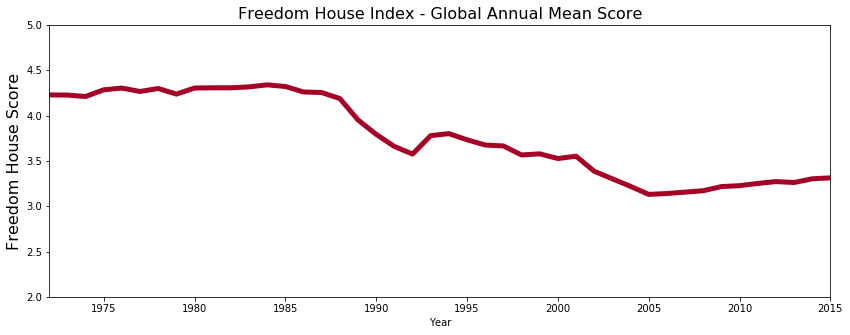

In [39]:
df['mean'] = df.mean(axis=1)
df['mean'].plot(xlim=(1972, 2015),ylim=(2, 5), figsize=(14,5), linewidth=5, colormap='RdYlGn')
plt.title('Freedom House Index - Global Annual Mean Score', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Freedom House Score', fontsize=16)
plt.savefig('fh_index_global_mean.png')

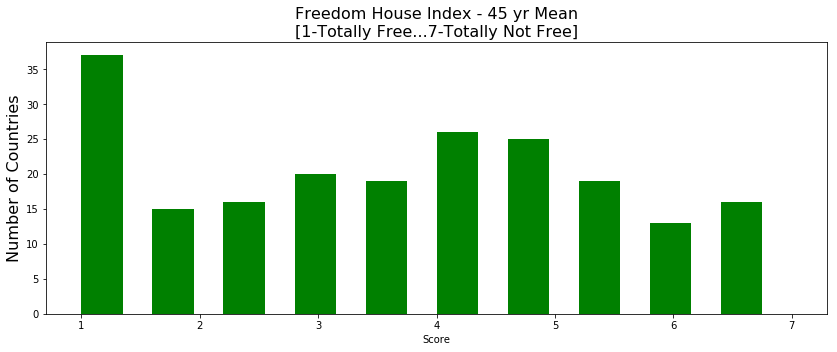

In [40]:
df.mean().hist(figsize=(14,5), grid='off', width=.35, color ='g')
plt.title('Freedom House Index - 45 yr Mean\n[1-Totally Free...7-Totally Not Free]', fontsize=16)
plt.ylabel('Number of Countries', fontsize=16)
plt.xlabel('Score')
plt.savefig('fh_bar_mean.pdf')

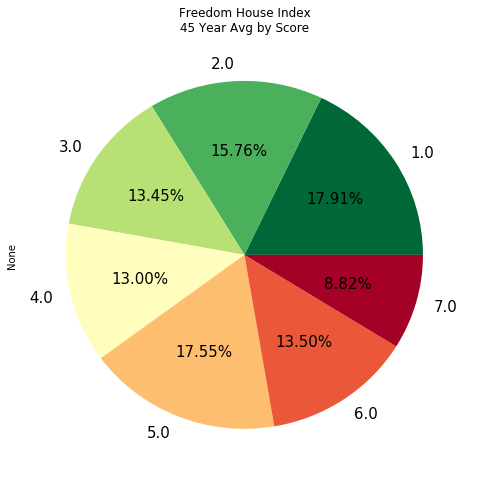

In [10]:
df2.mean(axis=1).plot(kind='pie', title='Freedom House Index\n45 Year Avg by Score', autopct='%.2f%%', fontsize=15, figsize=(8,8),colormap='RdYlGn_r')
plt.savefig('fh_pie_mean.png')

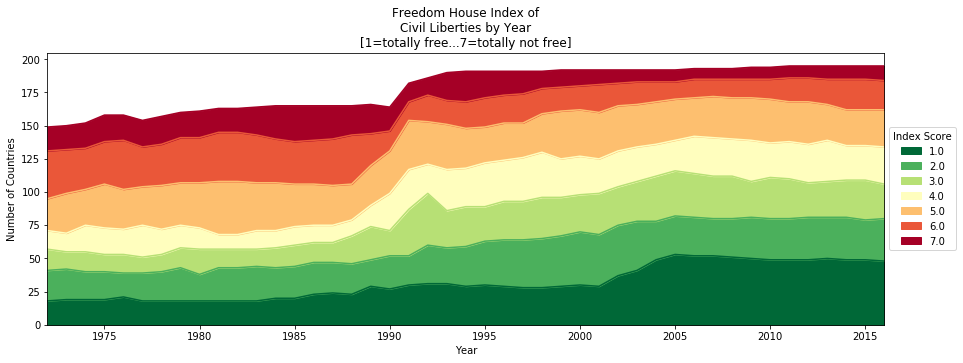

In [11]:
df2.T.plot(kind='area', figsize=(15,5),title='Freedom House Index of\nCivil Liberties by Year\n[1=totally free...7=totally not free]', colormap='RdYlGn_r')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Index Score')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.savefig('fh_area_mean.png')

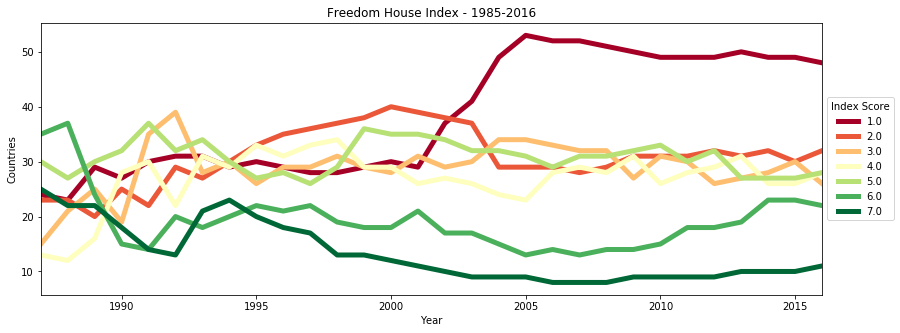

In [12]:
# drilling into 85-15 period
df2.T[15:].plot(figsize=(14,5), title='Freedom House Index - 1985-2016', colormap='RdYlGn', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Index Score')
plt.xlabel('Year')  
plt.ylabel('Countries')
plt.savefig('breakout_82_93_mean.png')

- saving this for later
bins = list(range(8))
group_names = [str(i) for i in list(range(1,8))]
categories = pd.cut(df['mea  n'], bins, labels=group_names)
df['categories'] = pd.cut(df['mean'], bins, labels=group_names)
df['scoresBinned'] = pd.cut(df['mean'], bins)

pd.value_counts(df['categories']).plot(kind='pie')
plt.legend(title= 'Scores')

> Limitations of the Research
 - key: multiple factors influence civil liberties and political rights

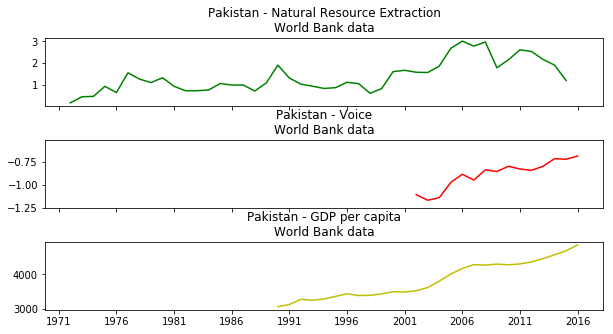

In [13]:
# country picker
df3 = fhfawb
mon = df3[df3['country'] == 'Pakistan']
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False, figsize=(10,5))
ax1.plot(mon.date, mon.nat, color='g')
ax1.set_title('Pakistan - Natural Resource Extraction\nWorld Bank data')
ax2.plot(mon.date, mon.voice, color='r')
ax2.set_title('Pakistan - Voice\nWorld Bank data')
ax3.plot(mon.date, mon.gdppc, color='y')
ax3.set_title('Pakistan - GDP per capita\nWorld Bank data')
f.subplots_adjust(hspace=.5)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.savefig('fh_tripart_mean.png')

## Question 3 - How has US foreign aid on democratic development (DRG) been spent?
- U.S. spending on democracy, human rights and governance by democratic status
- Totals by democratic status of recipient countries
- By the 10 countries with longest period of within the following democratic status

In [14]:
fhfawb.head(2)

,FH_Score,year,country,FH_value,date,gdppc,gini,nat,pop,voice,wb_code,GEC,ISO3166_S,ISO3166_N,internet,country_id,country_y,region_id,region_name,income_group_id,income_group_name,income_group_acronym,implementing_agency_id,implementing_agency_acronym,implementing_agency_name,implementing_subagency_id,subagency_acronym,subagency_name,channel_category_id,channel_category_name,channel_subcategory_id,channel_subcategory_name,channel_id,channel_name,dac_category_id,dac_category_name,dac_sector_code,dac_sector_name,dac_purpose_code,dac_purpose_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,assistance_category_id,assistance_category_name,aid_type_group_id,aid_type_group_name,activity_id,activity_name,activity_project_number,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,current_amount,constant_amount,USG_sector_id,USG_sector_name,framework,submission_id
0,PR,1972,Afghanistan,4,1972-01-01,NaN,NaN,0.397964,11721940.0,NaN,AFG,AF,AF,4,.af,4.0,Afghanistan,4.0,South and Central Asia,1.0,Low Income Country,LIC,1.0,USAID,U.S. Agency for International Development,999.0,NaN,not applicable,1.0,Government,1.0,Government - United States,1999999.0,U.S. Government - Other,7.0,Other,430.0,Other Multisector,43010.0,Multisector aid,12x2278,Public Law 480 Title II Grants,5.0,Department of Agriculture,AGR,1.0,Economic,3.0,Project-Type,74.0,Title II Emergency Programs,NaN,NaN,NaN,2.0,Obligations,18600000.0,84188676.0,25.0,Macroeconomic Foundation for Growth,NaN,1.0
1,PR,1972,Afghanistan,4,1972-01-01,NaN,NaN,0.397964,11721940.0,NaN,AFG,AF,AF,4,.af,4.0,Afghanistan,4.0,South and Central Asia,1.0,Low Income Country,LIC,1.0,USAID,U.S. Agency for International Development,999.0,NaN,not applicable,1.0,Government,1.0,Government - United States,1999999.0,U.S. Government - Other,7.0,Other,430.0,Other Multisector,43010.0,Multisector aid,72xH020,INACTIVE - USAID Grants,1.0,U.S. Agency for International Development,USAID,1.0,Economic,3.0,Project-Type,85.0,USAID Grants,NaN,NaN,NaN,2.0,Obligations,6600000.0,29873401.0,25.0,Macroeconomic Foundation for Growth,NaN,1.0


> Spending Trends by Freedom

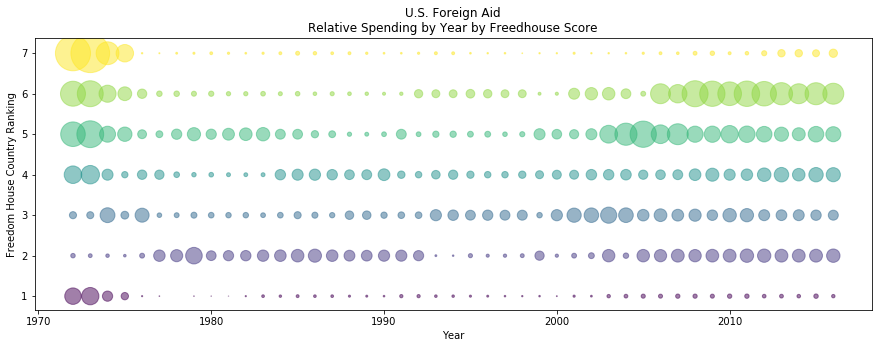

In [43]:
dfq3 = fhfawb[(fhfawb.FH_Score == 'CL')&(fhfawb.FH_Score == 'CL')].groupby(['year', 'FH_value'])[['constant_amount']].sum().reset_index()

dfq3.FH_value = dfq3.FH_value.replace('-',np.nan).sort_values().astype(float)

x = dfq3.year
y = dfq3.FH_value
colors = dfq3.FH_value
areax = dfq3.constant_amount  
area = (areax-min(areax))/(max(areax)-min(areax))*1500  # 0 to 15 point radii times 100
plt.figure(figsize=(15, 5))
plt.scatter(x, y, s=area,  c=colors, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Freedom House Country Ranking')
plt.title('U.S. Foreign Aid\nRelative Spending by Year by Freedhouse Score')
plt.savefig('FA_spending_by_year.png')

> Who spends the money?

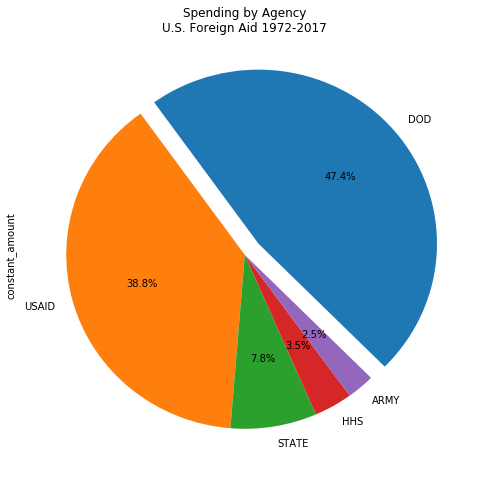

In [17]:
Y_filt = fhfawb[(fhfawb.year > 1972)&(fhfawb.transaction_type_name == 'Disbursements')]
s_agency_cat= Y_filt \
.groupby(['implementing_agency_acronym'])[['constant_amount','FH_value']].sum() \
.constant_amount.sort_values(ascending=False)
explode = (.1,0,0,0,0)
plt.figure(figsize=(8,8))
s_agency_cat.head(5).plot(title='Spending by Agency\nU.S. Foreign Aid 1972-2017', \
                           kind='pie', autopct='%1.1f%%', explode=explode, startangle=-45);
# plt.ylabel('Percentage of Total')

> And then Who Spends the Money?

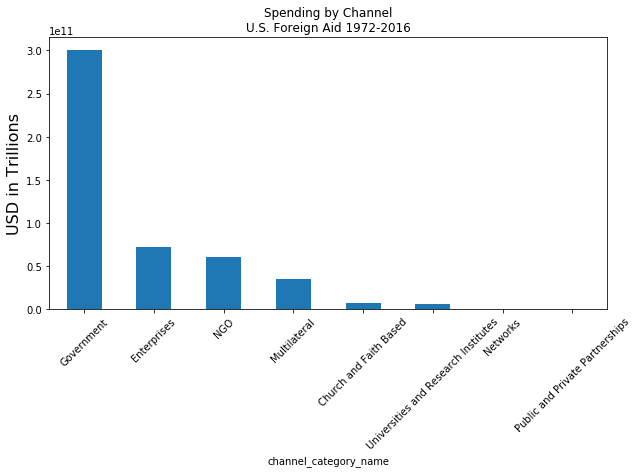

In [52]:
CL_filt = fhfawb[(fhfawb.FH_Score == 'CL')&(fhfawb.transaction_type_name == 'Disbursements')]
df_chan_cat= CL_filt \
.groupby(['channel_category_name'])[['constant_amount','FH_value']].sum()

df_chan_cat = df_chan_cat.sort_values(by='constant_amount', ascending=False)

df_chan_cat.constant_amount.head(10).plot(kind='bar', figsize=(10,5))
plt.title('Spending by Channel\nU.S. Foreign Aid 1972-2016')
plt.ylabel('USD in Trillions', fontsize=16)
plt.xticks(rotation=45);

> What is the Money Spent on?

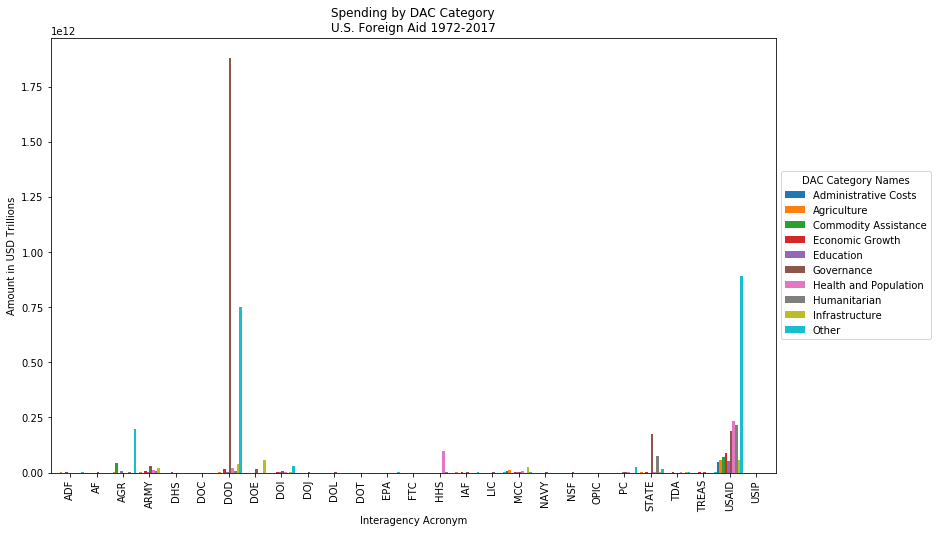

In [66]:
R_filt = fhfawb[(fhfawb.year > 1972)]
s_agency_dac_cat = R_filt \
.groupby(['implementing_agency_acronym','dac_category_name'])[['constant_amount','FH_value']].sum()

s_agency_dac_cat.head()

pivtest = s_agency_dac_cat.reset_index()
pt = pivtest.pivot(index='implementing_agency_acronym', columns='dac_category_name', values='constant_amount')
pt = pt.fillna(0)
pt.apply(lambda x: 100 * x / float(x.sum()))
pt.plot(kind='bar', figsize=(13,8), width=1, title='Spending by DAC Category\nU.S. Foreign Aid 1972-2017')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='DAC Category Names')
plt.ylabel('Amount in USD Trillions')
plt.xlabel('Interagency Acronym');

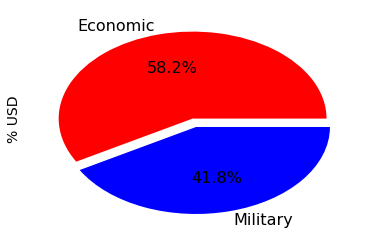

In [67]:
# pie chart simple breakdown of mil econ spending
Y_filt = fhfawb[(fhfawb.year > 1972)& (fhfawb.transaction_type_name == 'Disbursements')]
xcorr_fh_amt = Y_filt \
.groupby(['assistance_category_name'])[['constant_amount','FH_value']].sum() \
.constant_amount.sort_values(ascending=False)
xcorr_fh_amt.plot(kind='pie', colors= 'Rb', autopct='%1.1f%%', explode = [0,.1], fontsize=16)
plt.ylabel(s= '% USD', fontsize=14);

In [19]:
# breakdown of single list of spending by dac category
Y_filt = fhfawb[(fhfawb.year > 1972)]
df_dac_cat= Y_filt \
.groupby(['dac_category_name'])[['constant_amount','FH_value']].sum()

df_dac_cat.head()

,constant_amount
dac_category_name,
Administrative Costs,5.598615e+10
Agriculture,7.831566e+10
Commodity Assistance,1.132128e+11
Economic Growth,1.216939e+11
Education,7.448538e+10


In [68]:
# simple ranked list by dac category amount

s_dac_rank = df_dac_cat.rank(ascending=False).astype(int)

top_dac = pd.DataFrame(s_dac_rank)

#top_dac['sector'] = s_dac_cat

top_dac = top_dac.reset_index() \
.rename(columns={'constant_amount':'rank', 'implementing_agency_acronym': 'agency', 'agency':'constant_amount'}) \
.set_index('rank')

top_dac = top_dac.reset_index()
top_dac.sort_values(by='rank', ascending=True).set_index('rank')[['dac_category_name']]

,dac_category_name
rank,
1,Governance
2,Other
3,Health and Population
4,Humanitarian
5,Infrastructure
6,Economic Growth
7,Commodity Assistance
8,Agriculture
9,Education


In [24]:
# table of spending by agency and dac category
pt.head()

dac_category_name,Administrative Costs,Agriculture,Commodity Assistance,Economic Growth,Education,Governance,Health and Population,Humanitarian,Infrastructure,Other
implementing_agency_acronym,,,,,,,,,,
ADF,22482693.0,7.230324e+08,8.997537e+06,4.796087e+08,5.062897e+07,9.324052e+07,4.959136e+07,0.000000e+00,4.478816e+07,6.797270e+08
AF,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.175709e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
AGR,0.0,1.700898e+09,4.293486e+10,7.052969e+07,8.616434e+09,4.793194e+07,2.448964e+07,5.410391e+08,0.000000e+00,1.961954e+11
ARMY,0.0,2.513917e+09,1.638940e+08,8.950652e+09,4.691707e+09,3.027955e+10,1.076608e+10,7.251105e+09,2.232633e+10,4.383938e+07
DHS,0.0,0.000000e+00,0.000000e+00,3.186823e+08,0.000000e+00,9.256442e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [71]:
Y_filt = fhfawb[(fhfawb.year > 1972)]
df_dac_econmil_cat= Y_filt \
.groupby(['dac_category_name','assistance_category_name'])[['constant_amount','FH_value']].sum()


df_dac_econmil_cat2 = df_dac_econmil_cat.sort_values(by='constant_amount', ascending=False)

df_dac_econmil_cat2 = df_dac_econmil_cat2.groupby(level=0)\
.apply(lambda x: 100 * x / float(x.sum()))

In [26]:
df_dac_econmil_table = df_dac_econmil_cat2.reset_index()\
.pivot(index= 'dac_category_name',columns =  'assistance_category_name', values = 'constant_amount')\
.reset_index()

df_dac_econmil_table.columns = ['dac_category_name','economic','military']

df_dac_econmil_table= df_dac_econmil_table.fillna(0).sort_values(by='military',ascending=False)

df_dac_econmil_table.set_index('dac_category_name').rename(columns={'economic':'pct_economic','military':'pct_military' })

,pct_economic,pct_military
dac_category_name,,
Governance,18.224074,81.775926
Other,60.983270,39.016730
Infrastructure,94.401732,5.598268
Economic Growth,98.058619,1.941381
Humanitarian,99.615469,0.384531
Health and Population,99.998567,0.001433
Administrative Costs,100.000000,0.000000
Agriculture,100.000000,0.000000
Commodity Assistance,100.000000,0.000000


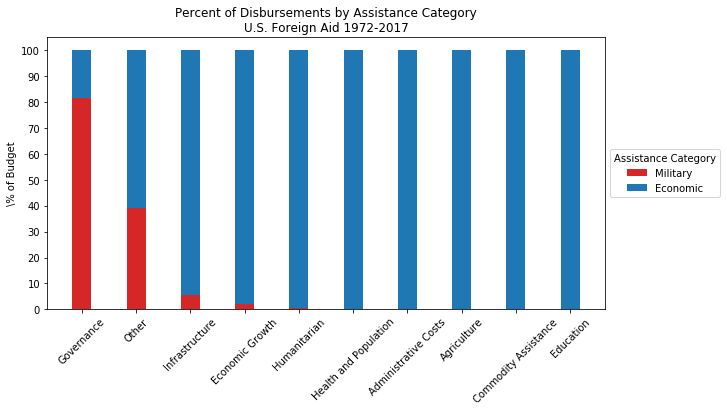

In [27]:
N = 10
Military = df_dac_econmil_table.military
Economic = df_dac_econmil_table.economic

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(10,5))
p1 = plt.bar(ind, Military, width, color='#d62728',)
p2 = plt.bar(ind, Economic, width,
             bottom=Military)

plt.ylabel('\% of Budget')
plt.title('Percent of Disbursements by Assistance Category\nU.S. Foreign Aid 1972-2017')
plt.xticks(ind, df_dac_econmil_table.dac_category_name, rotation=45)
plt.yticks(np.arange(0, 110, 10))
plt.legend((p1[0], p2[0]), ('Military', 'Economic'),\
           loc='center left', bbox_to_anchor=(1.0, 0.5), title='Assistance Category');

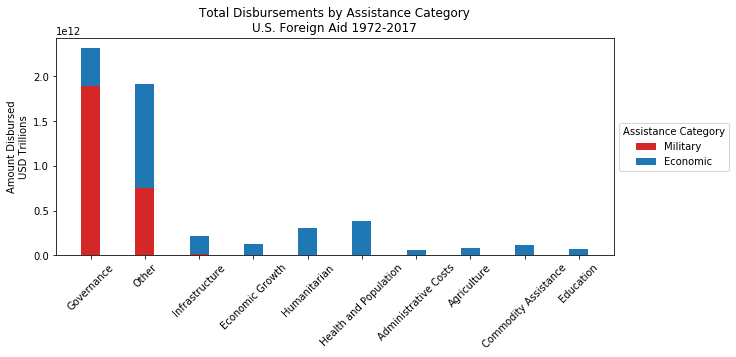

In [72]:
Y_filt = fhfawb[(fhfawb.year > 1972)]
df_dac_cat_econmil = Y_filt \
.groupby(['dac_category_name','assistance_category_name'])[['constant_amount','FH_value']].sum()

df_dac2_econmil_table = df_dac_cat_econmil.reset_index()\
.pivot(index= 'dac_category_name',columns =  'assistance_category_name', values = 'constant_amount')\
.reset_index()

df_dac2_econmil_table.columns = ['dac_category_name','economic','military']

df_dac2_econmil_table= df_dac2_econmil_table.fillna(0).sort_values(by='military',ascending=False)

N = 10
Military = df_dac2_econmil_table.military
Economic = df_dac2_econmil_table.economic

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(10,4))
p1 = plt.bar(ind, Military, width, color='#d62728',)
p2 = plt.bar(ind, Economic, width,
             bottom=Military)

plt.ylabel('Amount Disbursed\nUSD Trillions')
plt.title('Total Disbursements by Assistance Category\nU.S. Foreign Aid 1972-2017')
plt.xticks(ind, df_dac2_econmil_table.dac_category_name, rotation=45)
plt.legend((p1[0], p2[0]), ('Military', 'Economic'), loc='center left', bbox_to_anchor=(1.0, 0.5), title='Assistance Category');

> Top Ten Countries Aid has Been Spent in 
- 2008 -2016
- 2000-2008
- 1992-2000
- 1984-1992


In [29]:
# 2008 -2016
m_filt = fhfawb[(fhfawb.year <= 2016) & (fhfawb.year >= 2008) & (fhfawb.transaction_type_name == 'Disbursements')]

In [30]:
m_filt.groupby(['country'])[['constant_amount']].sum().sort_values(by='constant_amount', ascending=False).head(10)

,constant_amount
country,
Afghanistan,2.449981e+11
Iraq,9.380525e+10
Israel,8.407689e+10
"Egypt, Arab Rep.",4.074988e+10
Pakistan,3.305712e+10
Jordan,2.692082e+10
Ethiopia,2.169632e+10
Kenya,2.092663e+10
Colombia,1.697444e+10


In [31]:
# 2000 -2008
m_filt = fhfawb[(fhfawb.year <= 2008) & (fhfawb.year >= 2000) & (fhfawb.transaction_type_name == 'Disbursements')]

In [32]:
m_filt.groupby(['country'])[['constant_amount']].sum().sort_values(by='constant_amount', ascending=False).head(10)

,constant_amount
country,
Iraq,1.270135e+11
Israel,8.309340e+10
Afghanistan,7.203428e+10
"Egypt, Arab Rep.",5.895198e+10
Russian Federation,2.633816e+10
Jordan,1.821760e+10
Pakistan,1.707284e+10
Colombia,1.637416e+10
Ethiopia,1.135355e+10


In [33]:
# 2000 -2008
m_filt = fhfawb[(fhfawb.year <= 2000) & (fhfawb.year >= 1992)]

m_filt.groupby(['country'])[['constant_amount']].sum().sort_values(by='constant_amount', ascending=False).head(10)

,constant_amount
country,
Israel,1.256827e+11
"Egypt, Arab Rep.",8.464413e+10
Russian Federation,2.725143e+10
Turkey,1.287264e+10
Colombia,8.205688e+09
Ukraine,7.913135e+09
Greece,7.578070e+09
Jordan,7.234799e+09
India,6.553213e+09


In [34]:
# 1984 -1992
m_filt = fhfawb[(fhfawb.year <= 1992) & (fhfawb.year >= 1984)]

m_filt.groupby(['country'])[['constant_amount']].sum().sort_values(by='constant_amount', ascending=False).head(10).rank(ascending=False)

,constant_amount
country,
Israel,1.0
"Egypt, Arab Rep.",2.0
Turkey,3.0
Pakistan,4.0
Greece,5.0
El Salvador,6.0
Philippines,7.0
India,8.0
Honduras,9.0


In [35]:
'''
def percConvert(ser):
    return ser/float(ser[-1])
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(percConvert, axis=1)
'''

'\ndef percConvert(ser):\n    return ser/float(ser[-1])\npd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(percConvert, axis=1)\n'

In [36]:
c_by_FH_catsY = c_by_FH_catsY.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

NameError: name 'c_by_FH_catsY' is not defined

> Breakdown of spending by agency post 1972
- top ten
- overall stats

In [ ]:
Y_filt = fhfawb[(fhfawb.year > 1972)&(fhfawb.transaction_type_name == 'Disbursements')]
s_dac_cat= Y_filt \
.groupby(['dac_category_name'])[['constant_amount','FH_value']].sum() \
.constant_amount.sort_values(ascending=False)
s_dac_cat.head(10)

> Top ten sectors by disbursements (DAC sectors applied)

In [ ]:
Y_filt = fhfawb[(fhfawb.year > 1972)& (fhfawb.transaction_type_name == 'Disbursements') ]
s_dac_cat= Y_filt \
.groupby(['dac_sector_name'])[['constant_amount','FH_value']].sum() \
.constant_amount.sort_values(ascending=False)
s_dac_cat.head(10)

# Question - 4 Purpose: Does Aid Lead to Democratic Outcomes?
- general
- country specific

> Amount of spending by country and FH score

In [73]:
Y_filt = fhfawb[(fhfawb.year > 1971)& (fhfawb.FH_Score =='CL')& (fhfawb.transaction_type_name == 'Disbursements') ]
c_fhval_cat= Y_filt \
.groupby(['country','FH_value'])[['constant_amount']].agg({'sum'})
c_fhval_cat.head(10)

c_fhval_cat_pct = c_fhval_cat.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

c_fhval_cat_pct.head()

constant_amount
                                 sum
country     FH_value                
Afghanistan 5              12.046731
            6              87.896851
            7               0.056419
Albania     3              92.540309
            4               7.459691

> years a country was in a particular category

In [74]:
c_by_FH_catsY = Y_filt.groupby(['year','country','FH_value'])['FH_Score'].count().reset_index()\
.groupby(['country','FH_value'])['FH_Score'].count()

# c_fhval_cat.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).max(level=0)
c_by_FH_catsY = c_by_FH_catsY.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

c_by_FH_catsY.head(20)

c_fhval_cat.reset_index(inplace=True)
c_fhval_cat_pct.reset_index(inplace=True)
# c_by_FH_catsY

c_fhval_cat_pct['FH_years'] = c_by_FH_catsY.reset_index().rename(columns={'FH_Score': 'FH_years'}).FH_years

c_fhval_cat_pct['FH_cons_amt'] = c_fhval_cat.reset_index().constant_amount['sum']

c_fhval_cat_pct.columns = ['country', 'FH_value', 'pct_cons_amt_FH_cat', 'pct_yrs_in_FH_cat', 'cons_amt_by_cat']

fh_val_const =  c_fhval_cat_pct[['country', 'FH_value', 'pct_yrs_in_FH_cat', 'cons_amt_by_cat', 'pct_cons_amt_FH_cat']]

fh_val_const.FH_value = fh_val_const.FH_value.astype(float)

fh_val_const.sort_values(by='country', inplace=True)

fh_val_const.head()

# fh_val_const['ratio_consamt_yrsFH'] = fh_val_const['pct_cons_amt_FH_cat']/fh_val_const['pct_yrs_in_FH_cat']

,country,FH_value,pct_yrs_in_FH_cat,cons_amt_by_cat,pct_cons_amt_FH_cat
0,Afghanistan,5.0,18.75,1.160199e+10,12.046731
1,Afghanistan,6.0,75.00,8.465186e+10,87.896851
2,Afghanistan,7.0,6.25,5.433568e+07,0.056419
3,Albania,3.0,93.75,6.893452e+08,92.540309
4,Albania,4.0,6.25,5.556824e+07,7.459691


> Country volatility and spending

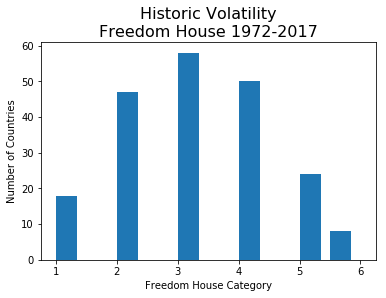

In [131]:
check = fhfawb[fhfawb.FH_Score == 'CL'].groupby(['country', 'FH_value'])[['FH_value']].count()

check.columns = [['FH_values']]

check.reset_index().groupby('country')[['FH_value']].count() \
.rename(columns={'FH_value':'FH_cat_range'}).hist(grid='False', width=.35)
plt.xlabel('Freedom House Category')
plt.ylabel('Number of Countries')
plt.title('Historic Volatility\nFreedom House 1972-2017',fontsize=16);


In [132]:
check = check.reset_index().groupby('country')[['FH_value']].count().rename(columns={'FH_value':'FH_cat_volatility'})
check.head()

# this is the table for the histogram above
check_table = check.groupby('FH_cat_volatility')[['FH_cat_volatility']].count()

check = check.reset_index().sort_values(by='FH_cat_volatility',ascending=False)
check.set_index('country').head()

,FH_cat_volatility
country,
Cabo Verde,6
Argentina,6
Benin,6
Grenada,6
Hungary,6


> Historic Volatility and Spending

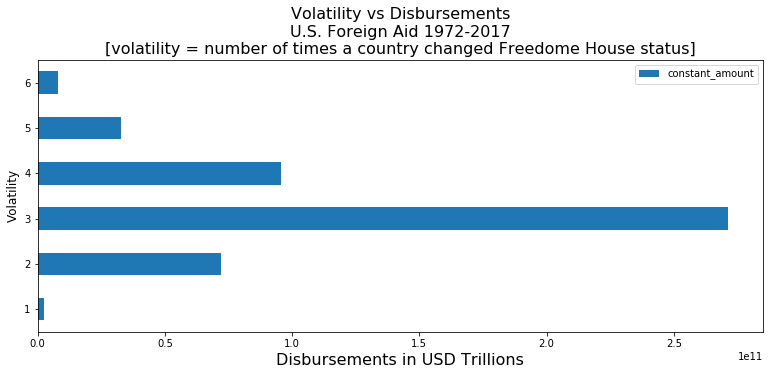

In [133]:
vol_spend = fhfawb[(fhfawb.FH_Score == 'CL') & (fhfawb.transaction_type_name == 'Disbursements')].groupby(['country'])[['constant_amount']].sum()

vol_spend = vol_spend.reset_index().sort_values(by='country')

vol_spend = vol_spend.merge(check, how='left', on='country').sort_values(by='FH_cat_volatility', ascending=False)

vol_spend.FH_cat_volatility = vol_spend.FH_cat_volatility.astype('category')

vol_spend_cht = vol_spend.groupby(['FH_cat_volatility'])[['constant_amount']].sum()
vol_spend_cht.plot(kind='barh', figsize=(13,5))
plt.title('Volatility vs Disbursements\nU.S. Foreign Aid 1972-2017\n[volatility = number of times a country changed Freedome House status]', fontsize=16)
plt.ylabel('Volatility',fontsize=12)
plt.xlabel('Disbursements in USD Trillions', fontsize=16);

Text(0.5,0,'number of countries')

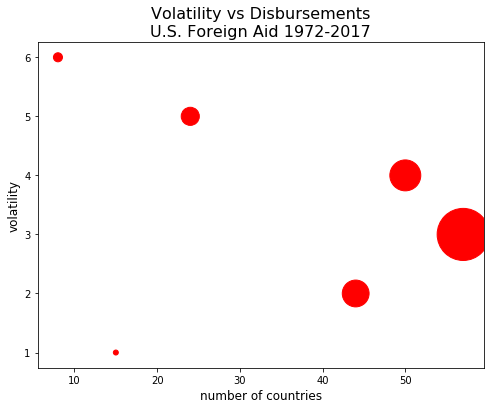

In [134]:
vol_spend_bub = vol_spend.groupby('FH_cat_volatility').sum().reset_index()
vol_spend_bub['countries'] = vol_spend.groupby('FH_cat_volatility').count().reset_index().country
x=vol_spend_bub['countries']
y=vol_spend_bub['FH_cat_volatility']
s=vol_spend_bub['constant_amount']/100000000
plt.figure(figsize=(8,6))
plt.scatter(x,y,s=s, c='r')
plt.title('Volatility vs Disbursements\nU.S. Foreign Aid 1972-2017',fontsize=16)
plt.ylabel('volatility', fontsize=12)
plt.xlabel('number of countries', fontsize=12)

In [135]:
Y_filt = fhfawb[(fhfawb.year > 1972)& (fhfawb.FH_Score == 'CL')& (fhfawb.transaction_type_name == 'Disbursements')]

Y_filt.FH_value = Y_filt.FH_value.astype(float)

diff_s = Y_filt.groupby(['country', 'year'])['FH_value','constant_amount'].mean()

# this is where the diff is calculated
diff_s = diff_s.groupby(level=0).diff()

diff_s.reset_index(inplace=True)
diff_s['year'] = pd.to_datetime(diff_s.reset_index().year,format='%Y')

C:\Users\silas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


> Correlation between Change in Freedom Score and USD Spending
- Insignificant in general

In [109]:
diff_s.corr()


,FH_value,constant_amount
FH_value,1.000000,0.020344
constant_amount,0.020344,1.000000


> Correlation between Change in Freedom Score and USD Spending
- At a Country Level in Volatile Countries
- Examples

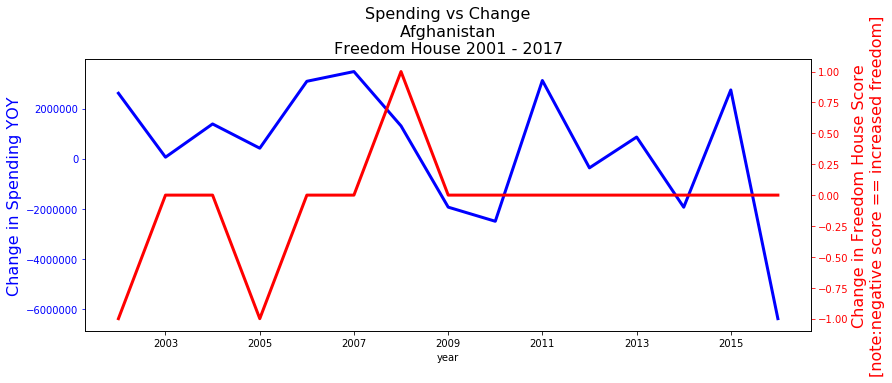

In [114]:
COUNTRY_NAME = 'Afghanistan'

diff_s_af = diff_s
diff_s_af = diff_s[diff_s.country == COUNTRY_NAME]
fig, ax1 = plt.subplots(figsize=(13,5))
t = diff_s_af.year
s1 = diff_s_af.constant_amount
ax1.plot(t, s1, 'b', linewidth=3.0)
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Change in Spending YOY', color='b', fontsize=16)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = diff_s_af.FH_value
ax2.plot(t, s2, 'r', linewidth=3.0)
ax2.set_ylabel('Change in Freedom House Score\n[note:negative score == increased freedom]', color='r', fontsize=16)
ax2.tick_params('y', colors='r')
fig.savefig('test.jpg')
plt.title('Spending vs Change\n{}\nFreedom House 2001 - 2017'.format(COUNTRY_NAME), color='k', fontsize=16);

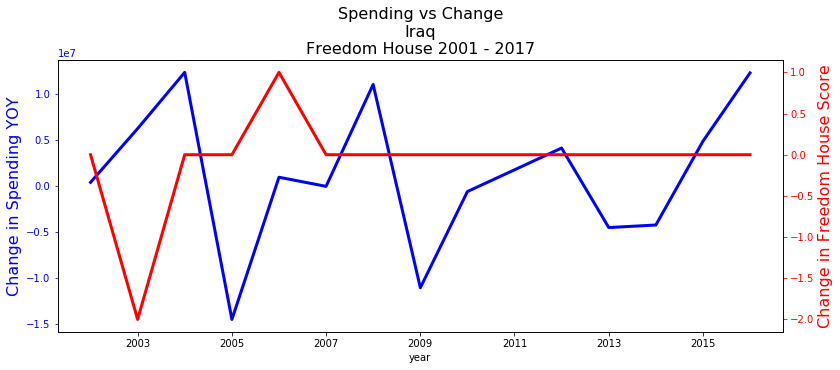

In [116]:
COUNTRY_NAME = 'Iraq'

diff_s_af = diff_s
diff_s_af = diff_s[diff_s.country == COUNTRY_NAME]
fig, ax1 = plt.subplots(figsize=(13,5))
t = diff_s_af.year
s1 = diff_s_af.constant_amount
ax1.plot(t, s1, 'b', linewidth=3.0)
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Change in Spending YOY', color='b', fontsize=16)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = diff_s_af.FH_value
ax2.plot(t, s2, 'r', linewidth=3.0)
ax2.set_ylabel('Change in Freedom House Score', color='r', fontsize=16)
ax2.tick_params('y', colors='r')
fig.savefig('test.jpg')
plt.title('Spending vs Change\n{}\nFreedom House 2001 - 2017'.format(COUNTRY_NAME), color='k', fontsize=16);

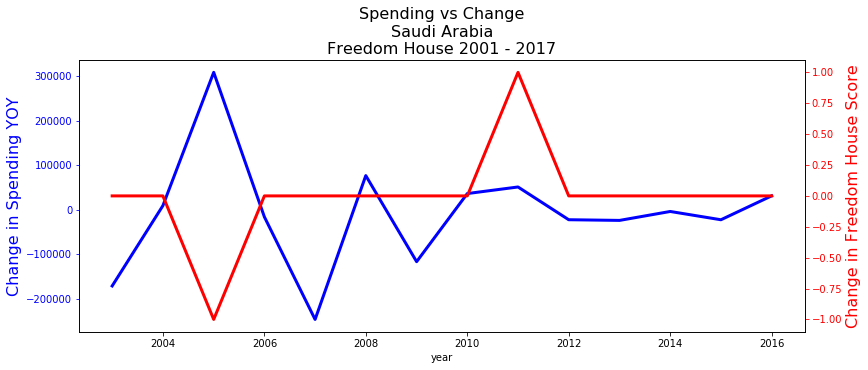

In [119]:
COUNTRY_NAME = 'Saudi Arabia'

diff_s_af = diff_s
diff_s_af = diff_s[diff_s.country == COUNTRY_NAME]
fig, ax1 = plt.subplots(figsize=(13,5))
t = diff_s_af.year
s1 = diff_s_af.constant_amount
ax1.plot(t, s1, 'b', linewidth=3.0)
ax1.set_xlabel('year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Change in Spending YOY', color='b', fontsize=16)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = diff_s_af.FH_value
ax2.plot(t, s2, 'r', linewidth=3.0)
ax2.set_ylabel('Change in Freedom House Score', color='r', fontsize=16)
ax2.tick_params('y', colors='r')
fig.savefig('test.jpg')
plt.title('Spending vs Change\n{}\nFreedom House 2001 - 2017'.format(COUNTRY_NAME), color='k', fontsize=16);

In [ ]:
'''
def percConvert(ser):
    return ser/float(ser[-1])
pd.crosstab(diff_s["FH_value"],diff_s["constant_amount"],margins=True).apply(percConvert, axis=1)
'''

In [ ]:
big_piv = pd.pivot_table(diff_s, values=['FH_value', 'constant_amount'], index=['year'], columns=['country'],\
               aggfunc={'constant_amount':np.sum, 'FH_value': np.sum}, fill_value=0)


In [ ]:
#  np.diff(t) / np.abs(t[:-1]) * 100

In [ ]:
'''
np.random.seed(0)
x = diff_s.FH_value
y = diff_s.year
# x, y = np.random.randn(2, 100)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)
'''

In [ ]:
not_free = fh_CL_df[(fh_CL_df['FH_value'] == 6.0)|(fh_CL_df['FH_value'] == 7.0)]
not_free = not_free.groupby('Year').count()
del not_free['FH_value']
not_free.rename(columns={'country_name': 'country_count'}, inplace=True)

free = fh_CL_df[(fh_CL_df['FH_value'] == 1.0)|(fh_CL_df['FH_value'] == 2.0)]
free = free.groupby('Year').count()
free.rename(columns={'country_name':'country_count'}, inplace=True)

partly_free = fh_CL_df[(fh_CL_df['FH_value'] == 3.0)|(fh_CL_df['FH_value'] == 4.0)|(fh_CL_df['FH_value'] == 5.0)]
partly_free = partly_free.groupby('Year').count()
partly_free.rename(columns={'country_name':'country_count'}, inplace=True)

width = .3
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(111)
rects1 = ax.bar(free.index, not_free['country_count'], width, color='r')
rects2 = ax.bar(free.index+width, free['country_count'], width, color='b')
# rects3 = ax.bar(free.index+width+.5, partly_free['country_count'], width, color='b')

# add some
ax.set_ylabel('Countries')
ax.set_xlabel('Years')
ax.set_title('Not Free vs. Free\nFreedom House')

ax.legend((rects1[0], rects2[0]), ('Not Free', 'Free'));

In [ ]:
fhfawb.head()

# For additional calcs

In [ ]:
# make sure not to calculate null values for FH
FHFAWB_df = FHFAWB_df[FHFAWB_df['FH_value'].isnull() == False]

# calculate diffs, pct change, and rolling mean of y2y pct change (5 years) for FH score
FHFAWB_df['FH_diff'] = FHFAWB_df.FH_value.diff()
FHFAWB_df['FH_pct_change'] = FHFAWB_df.FH_value.pct_change()
FHFAWB_df = FHFAWB_df.sort_values(by=['country', 'year'])
FHFAWB_df['FH_pct_rolling5'] = FHFAWB_df['FH_value'].rolling(5).mean()

# calculate covariance for FH pct change
FHFAWB_df.constant_pct_chg.cov(FHFAWB_df.FH_diff)

%store FHFAWB_df

FHFAWB_df.head()

In [ ]:
# select feature (here its amounts), reduce(agg years), select/add FH score
df_fa_prep = df_fa.groupby(['country', 'year','country_code', 'country_id'])['current_amount', 'constant_amount'].mean()
df_fa_prep['current_diff'] = df_fa_prep.current_amount.diff()
df_fa_prep['constant_diff'] = df_fa_prep.constant_amount.diff()
df_fa_prep['current_pct_chg'] = df_fa_prep.current_amount.pct_change()
df_fa_prep['constant_pct_chg'] = df_fa_prep.constant_amount.pct_change()
df_fa_prep.reset_index(inplace=True)
df_fa_prep.rename(columns={'country_name':'country'}, inplace=True)
%store df_fa_prep

In [ ]:
# country case picker
fhfawb[(fhfawb.year > 1979 ) & (fhfawb.year < 1993 ) & (fhfawb.country == 'Argentina')]\
.sort_values(by='current_amount', ascending=False).plot(x='year', y='current_amount', kind='scatter')

# browser for FH == 2
fhfawb[(fhfawb.year > 1979 ) & (fhfawb.year < 1993 ) & (fhfawb.FH_value == 2.0)]\
.sort_values(by='current_amount', ascending=False)

# FH CL 3 countries '93 to '99
fhfawb[(fhfawb.year > 1993 ) & (fhfawb.year < 1999 ) & (fhfawb.FH_value == 6.0)].country.unique()

# country case picker
fhfawb[(fhfawb.year > 1993 ) & (fhfawb.year < 1999 ) & (fhfawb.country == 'Peru')]\
.sort_values(by='current_amount', ascending=False).plot(x='year', y='constant_amount', kind='scatter')

fhfawb[(fhfawb.year > 1993 ) & (fhfawb.year < 1999 ) & (fhfawb.FH_value == 3.0)]\
.sort_values(by='constant_amount', ascending=False)[:20]


In [ ]:
'''
Cheatsheet_________________________________
Function	Description
count	Number of non-null observations
sum	Sum of values
mean	Mean of values
mad	Mean absolute deviation
median	Arithmetic median of values
min	Minimum
max	Maximum
mode	Mode
abs	Absolute Value
prod	Product of values
std	Unbiased standard deviation
var	Unbiased variance
sem	Unbiased standard error of the mean
skew	Unbiased skewness (3rd moment)
kurt	Unbiased kurtosis (4th moment)
quantile	Sample quantile (value at %)
cumsum	Cumulative sum
cumprod	Cumulative product
cummax	Cumulative maximum
cummin	Cumulative minimum
'''